**Assignment Questions:**


**1. Handling Ordinal Data**
Q1: Convert the 'SpendingScore' column to ordinal values. The values 'Low', 'Medium', and 'High' should be represented as 0, 1, and 2 respectively.

Q2: After converting 'SpendingScore' to ordinal values, check the distribution of 'SpendingScore' and describe the frequency of each ordinal category.



**2. Handling Dates**


Q3: Convert the 'PurchaseDate' column to datetime format. If any invalid values exist, they should be coerced into NaT.

Q4: Extract the year and month from the 'PurchaseDate' column and create two new columns: 'Year' and 'Month'. What is the most frequent year and month of purchase?

Q5: Filter the data to include only purchases made in 2023. How many such records exist?

**3. Visualizations Using Seaborn**


Q6: Create a boxplot to visualize the distribution of 'MonthlyIncome' across different 'SpendingScore' categories.

Q7: Create a scatter plot to explore the relationship between 'Age' and 'MonthlyIncome'. Do you observe any trends? Describe them.

Q8: Use a heatmap to visualize the correlation between 'Age', 'SpendingScore', 'MonthlyIncome', and 'PurchaseDate'. Which variables are most correlated?

Q9: Create a countplot to show the distribution of purchases across different 'SpendingScore' categories. How are the categories distributed?

Q10: Create a pairplot to visualize the relationships between 'Age', 'MonthlyIncome', and 'SpendingScore'. Which variables have the strongest relationships with each other?

**4. Advanced Visualization**


Q11: Create a violin plot to visualize the distribution of 'MonthlyIncome' across 'SpendingScore'. What can you infer about the income distribution for each spending score?

Q12: Plot a line plot to show the number of purchases made each month in 2023. How do the purchases vary over the months?

Q13: Use a histogram to show the distribution of 'Age'. What is the range of ages, and what is the mode?

Q14: Create a bar plot to show the average 'MonthlyIncome' for each 'SpendingScore' category. What is the income trend across different spending categories?

In [4]:
#import all libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#read customer data from file
custdf=pd.read_csv("customer_data.csv")
#get info for customer data
custdf.info()
custdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            50 non-null     int64 
 1   SpendingScore  50 non-null     object
 2   PurchaseDate   50 non-null     object
 3   MonthlyIncome  50 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


,Age,SpendingScore,PurchaseDate,MonthlyIncome
0,36,Low,2023-04-20,4500
1,40,Medium,2023-05-16,3200
2,55,Low,2023-04-21,5500
3,33,High,2023-05-15,4700
4,30,Medium,2023-06-01,5100


In [5]:
#1. Handling Ordinal Data
# Q1: Convert the 'SpendingScore' column to ordinal values. The values 'Low', 'Medium', and 'High' should be represented as 0, 1, and 2 respectively.

# Method 2: Using sci-kit learn
# You can use preprocessing package of sci-kit learn to encode ordinal data

from sklearn.preprocessing import OrdinalEncoder
spendingScoreOrder = ["Low", "Medium", "High"]
encoder = OrdinalEncoder(categories=[spendingScoreOrder])
custdf["SpendingScore"] = encoder.fit_transform(custdf[["SpendingScore"]])
custdf.head()

,Age,SpendingScore,PurchaseDate,MonthlyIncome
0,36,0.0,2023-04-20,4500
1,40,1.0,2023-05-16,3200
2,55,0.0,2023-04-21,5500
3,33,2.0,2023-05-15,4700
4,30,1.0,2023-06-01,5100


In [6]:
#Q2: After converting 'SpendingScore' to ordinal values, check the distribution of 'SpendingScore'
#and describe the frequency of each ordinal category.
custdf.describe()

,Age,SpendingScore,MonthlyIncome
count,50.000000,50.000000,50.000000
mean,40.680000,0.920000,4998.000000
std,9.916879,0.829064,546.413165
min,23.000000,0.000000,3200.000000
25%,33.000000,0.000000,4700.000000
50%,39.000000,1.000000,5000.000000
75%,47.750000,2.000000,5300.000000
max,60.000000,2.000000,6200.000000


In [16]:
#2. Handling Dates
#Q3: Convert the 'PurchaseDate' column to datetime format. If any invalid values exist, they should be coerced into NaT.

#Q4: Extract the year and month from the 'PurchaseDate' column and create two new columns: 'Year' and 'Month'. What is the most frequent year and month of purchase?

#Q5: Filter the data to include only purchases made in 2023. How many such records exist?

custdf['PurchaseDate'] = pd.to_datetime(custdf['PurchaseDate'], errors='coerce')
custdf.info()
custdf.head()

custdf['Year'] = custdf['PurchaseDate'].dt.year
custdf['Month'] = custdf['PurchaseDate'].dt.month

custdf['Year'].value_counts()
custdf['Month'].value_counts()
custdf.head()

filtercustdf = custdf[custdf['Year'] == 2023]
filtercustdf.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Age            50 non-null     int64         
 1   SpendingScore  50 non-null     float64       
 2   PurchaseDate   50 non-null     datetime64[ns]
 3   MonthlyIncome  50 non-null     int64         
 4   Year           50 non-null     int32         
 5   Month          50 non-null     int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2)
memory usage: 2.1 KB


,Age,SpendingScore,PurchaseDate,MonthlyIncome,Year,Month
0,36,0.0,2023-04-20,4500,2023,4
1,40,1.0,2023-05-16,3200,2023,5
2,55,0.0,2023-04-21,5500,2023,4
3,33,2.0,2023-05-15,4700,2023,5
4,30,1.0,2023-06-01,5100,2023,6


In [ ]:
#3. Visualizations Using Seaborn

#Q6: Create a boxplot to visualize the distribution of 'MonthlyIncome' across different 'SpendingScore' categories.

#Q7: Create a scatter plot to explore the relationship between 'Age' and 'MonthlyIncome'. Do you observe any trends? Describe them.

#Q8: Use a heatmap to visualize the correlation between 'Age', 'SpendingScore', 'MonthlyIncome', and 'PurchaseDate'. Which variables are most correlated?

#Q9: Create a countplot to show the distribution of purchases across different 'SpendingScore' categories. How are the categories distributed?

#Q10: Create a pairplot to visualize the relationships between 'Age', 'MonthlyIncome', and 'SpendingScore'. Which variables have the strongest relationships with each other?

<Axes: xlabel='MonthlyIncome', ylabel='SpendingScore'>

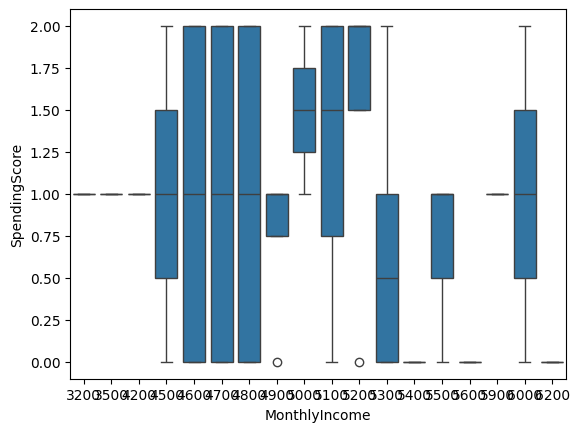

In [19]:
sns.boxplot(x='MonthlyIncome', y='SpendingScore', data=custdf)

,Age,SpendingScore,PurchaseDate,MonthlyIncome,Year,Month
count,50.000000,50.000000,50,50.000000,50.0,50.000000
mean,40.680000,0.920000,2023-07-05 21:36:00,4998.000000,2023.0,6.680000
min,23.000000,0.000000,2023-01-03 00:00:00,3200.000000,2023.0,1.000000
25%,33.000000,0.000000,2023-04-20 06:00:00,4700.000000,2023.0,4.000000
50%,39.000000,1.000000,2023-07-10 00:00:00,5000.000000,2023.0,7.000000
75%,47.750000,2.000000,2023-09-30 06:00:00,5300.000000,2023.0,9.750000
max,60.000000,2.000000,2023-12-25 00:00:00,6200.000000,2023.0,12.000000
std,9.916879,0.829064,NaN,546.413165,0.0,3.365127


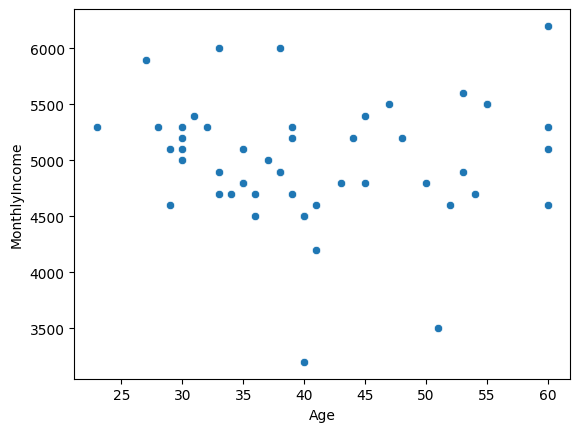

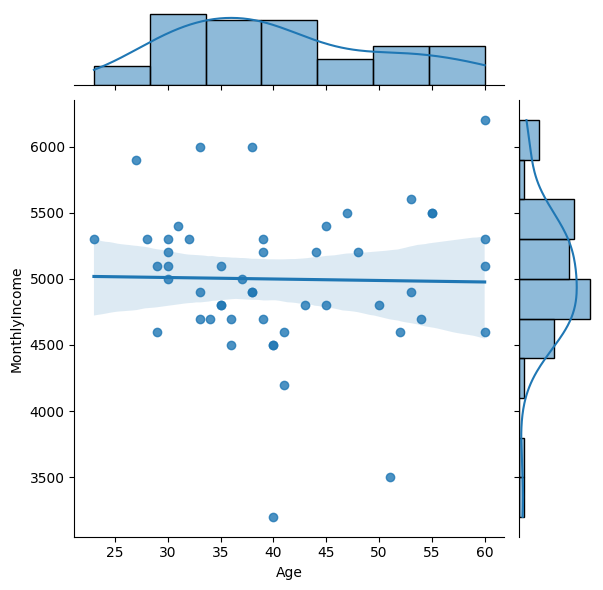

In [23]:
sns.scatterplot(x='Age', y='MonthlyIncome', data=custdf)
sns.jointplot(x='Age', y='MonthlyIncome', data=custdf, kind="reg")


In [24]:
custdf.describe()

,Age,SpendingScore,PurchaseDate,MonthlyIncome,Year,Month
count,50.000000,50.000000,50,50.000000,50.0,50.000000
mean,40.680000,0.920000,2023-07-05 21:36:00,4998.000000,2023.0,6.680000
min,23.000000,0.000000,2023-01-03 00:00:00,3200.000000,2023.0,1.000000
25%,33.000000,0.000000,2023-04-20 06:00:00,4700.000000,2023.0,4.000000
50%,39.000000,1.000000,2023-07-10 00:00:00,5000.000000,2023.0,7.000000
75%,47.750000,2.000000,2023-09-30 06:00:00,5300.000000,2023.0,9.750000
max,60.000000,2.000000,2023-12-25 00:00:00,6200.000000,2023.0,12.000000
std,9.916879,0.829064,NaN,546.413165,0.0,3.365127


<Axes: >

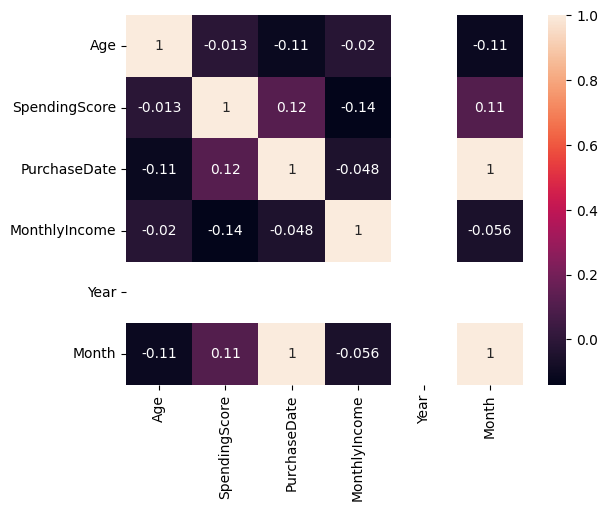

In [25]:

#Q8: Use a heatmap to visualize the correlation between 'Age', 'SpendingScore', 'MonthlyIncome', and 'PurchaseDate'.
#Which variables are most correlated?

sns.heatmap(data=custdf.corr(), annot=True)

<Axes: xlabel='SpendingScore', ylabel='count'>

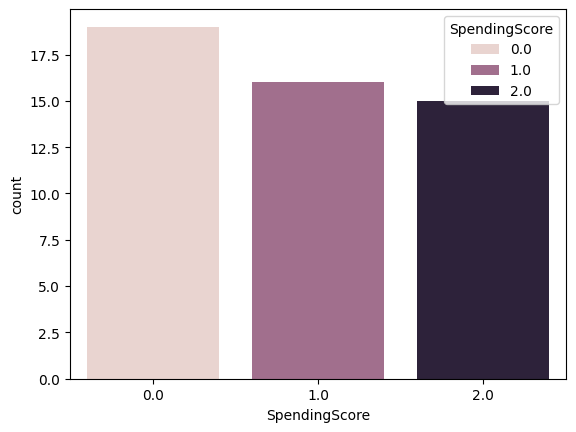

In [27]:
#Q9: Create a countplot to show the distribution of purchases across different 'SpendingScore' categories.
 #How are the categories distributed?
sns.countplot(x='SpendingScore', hue='SpendingScore', data=custdf)

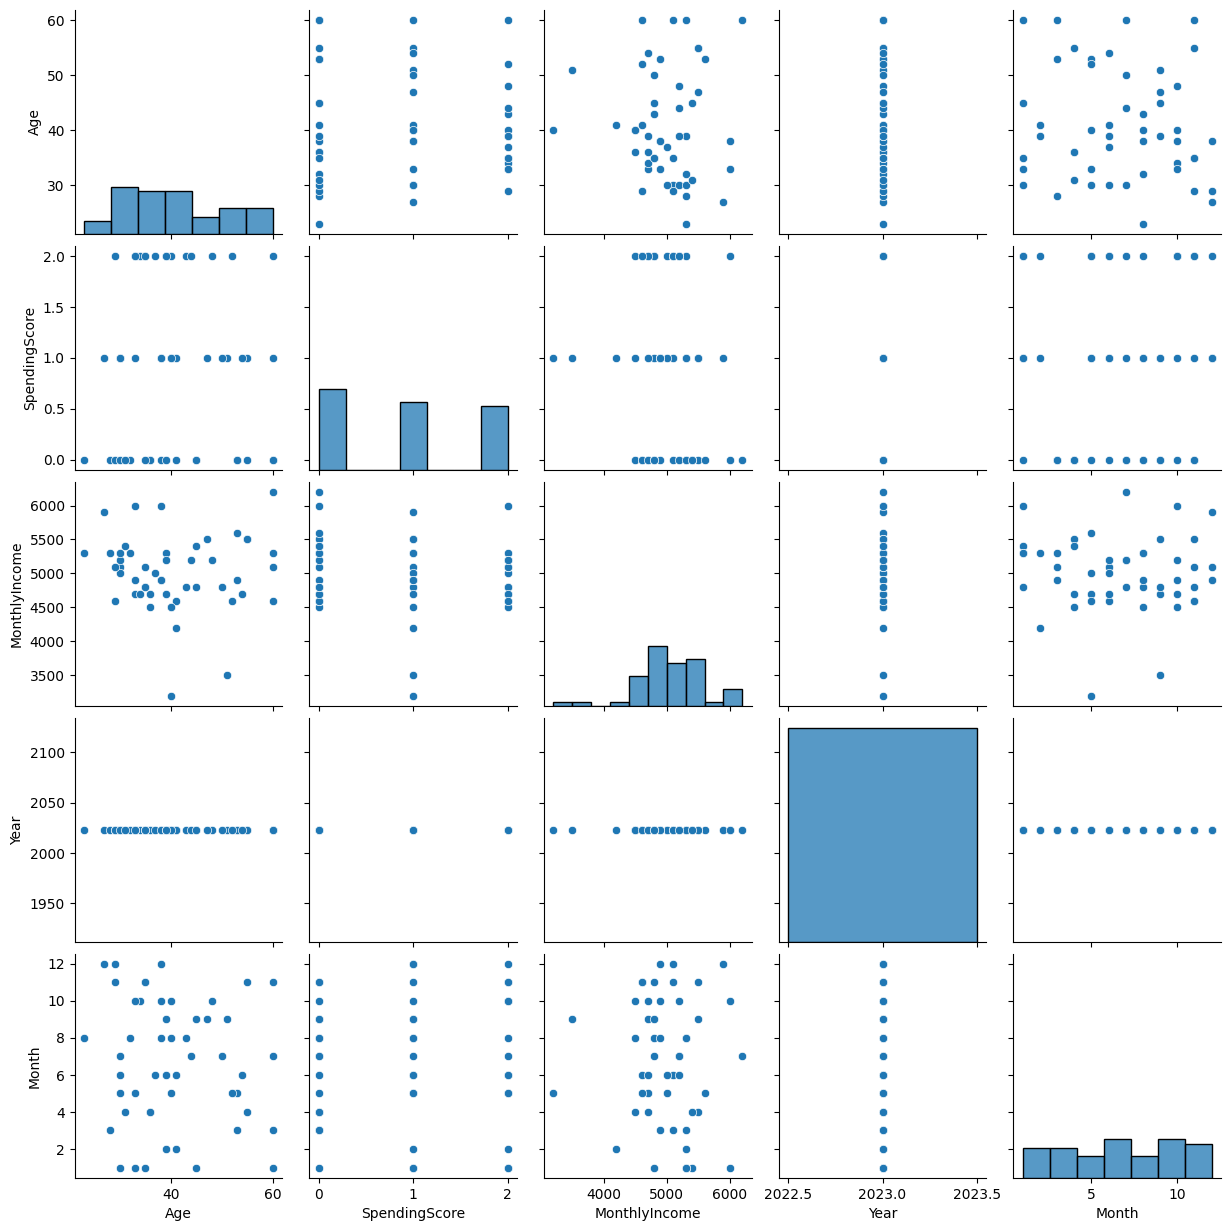

In [28]:
#Q10: Create a pairplot to visualize the relationships between 'Age', 'MonthlyIncome', and 'SpendingScore'.
#Which variables have the strongest relationships with each other?
sns.pairplot(custdf)


In [ ]:
#4. Advanced Visualization

#Q11: Create a violin plot to visualize the distribution of 'MonthlyIncome' across 'SpendingScore'. What can you infer about the income distribution for each spending score?

#Q12: Plot a line plot to show the number of purchases made each month in 2023. How do the purchases vary over the months?

#Q13: Use a histogram to show the distribution of 'Age'. What is the range of ages, and what is the mode?

#Q14: Create a bar plot to show the average 'MonthlyIncome' for each 'SpendingScore' category. What is the income trend across different spending categories?

<Axes: xlabel='SpendingScore', ylabel='MonthlyIncome'>

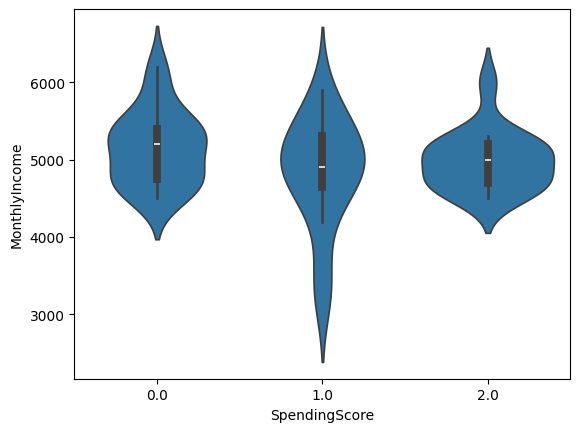

In [29]:
#Q11: Create a violin plot to visualize the distribution of 'MonthlyIncome' across 'SpendingScore'.
#What can you infer about the income distribution for each spending score?
sns.violinplot(data = custdf, x='SpendingScore', y='MonthlyIncome')

<Axes: xlabel='Month', ylabel='SpendingScore'>

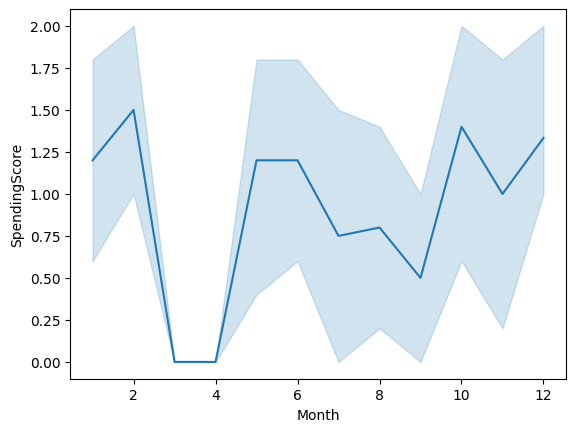

In [30]:
#Q12: Plot a line plot to show the number of purchases made each month in 2023.
#How do the purchases vary over the months?

sns.lineplot(data = custdf, x='Month', y='SpendingScore')
#

,Age
0,30
1,60


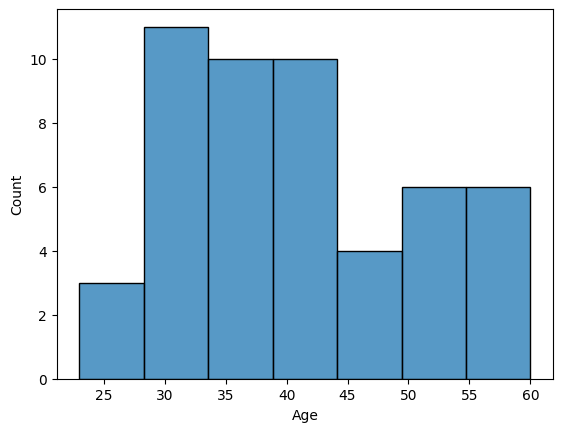

In [39]:
#Q13: Use a histogram to show the distribution of 'Age'. What is the range of ages, and what is the mode?
sns.histplot(data = custdf, x='Age')
#What is the range of ages, and what is the mode?
custdf['Age'].describe()
custdf['Age'].mode()


<Axes: xlabel='SpendingScore', ylabel='MonthlyIncome'>

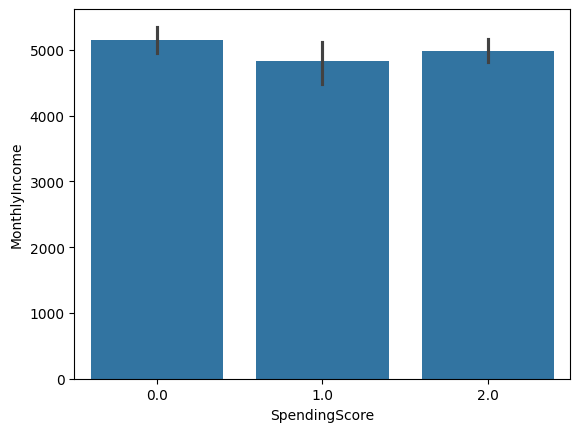

In [37]:

#Q14: Create a bar plot to show the average 'MonthlyIncome' for each 'SpendingScore' category.
#What is the income trend across different spending categories?
sns.barplot(data = custdf, x='SpendingScore', y='MonthlyIncome')